# Аналитика ЕГЭ  
* версия 2.6
* данная программа открывает файл (файлы) из папки ege и считывает данные (файлы в таблице *.xls).
* программа создает новый файл в формате analytics.xlsx 

## Программа выдает статистику по следующим пунктам
1. количество участников
2. средний балл
3. количество не сдавших экзамен
4. количество набравших минимальный проходной балл
5. количество высокобальников
6. какой минимальный балл получили на экзамене
7. какой максимальный балл получили на экзамене
8. количество участников набравших соответствующий балл
9. % выполнения отдельных заданий 1 части (в виде таблицы и графика)
10. % выполнения отдельных заданий 2 части

In [1]:
#подключаем библиотеки
import os
import pandas as pd
import numpy as np

### Считываем файлы из папки
#### (файлы должны быть по одному предмету)

In [2]:
import os
f  = os.listdir()
Files = ['./ege/'+i for i in os.listdir('./ege') if 'xls' in i]
if Files:
    print(Files)
else:
    print('папка пустая')

['./ege/рус.яз\xa0— копия 46.xls', './ege/рус.яз\xa0— копия 8.xls', './ege/рус.яз\xa0— копия 9.xls', './ege/рус.яз\xa0— копия 47.xls', './ege/рус.яз\xa0— копия 45.xls', './ege/рус.яз\xa0— копия 44.xls', './ege/рус.яз\xa0— копия 40.xls', './ege/рус.яз\xa0— копия 41.xls', './ege/рус.яз\xa0— копия 43.xls', './ege/рус.яз\xa0— копия 42.xls', './ege/рус.яз\xa0— копия 19.xls', './ege/рус.яз\xa0— копия 31.xls', './ege/рус.яз\xa0— копия 25.xls', './ege/рус.яз.xls', './ege/рус.яз\xa0— копия 24.xls', './ege/рус.яз\xa0— копия 30.xls', './ege/рус.яз\xa0— копия 18.xls', './ege/рус.яз\xa0— копия 26.xls', './ege/рус.яз\xa0— копия 32.xls', './ege/рус.яз\xa0— копия.xls', './ege/рус.яз\xa0— копия 33.xls', './ege/рус.яз\xa0— копия 27.xls', './ege/рус.яз\xa0— копия 23.xls', './ege/рус.яз\xa0— копия 37.xls', './ege/рус.яз\xa0— копия 36.xls', './ege/рус.яз\xa0— копия 22.xls', './ege/рус.яз\xa0— копия 34.xls', './ege/рус.яз\xa0— копия 20.xls', './ege/рус.яз\xa0— копия 21.xls', './ege/рус.яз\xa0— копия 35.xls'

## Удаляем лишние столбцы, переименовываем их и формируем все данные в один DataFrame

In [3]:
cols = ['kod','kod2','class','kodPPE','room','Last name', 'First name', 'Second name','doc_s','doc_number','result_1','result_2','first_ball','ball']
df = pd.DataFrame(columns=['kod','kod2','class','kodPPE','room','Last name', 'First name', 'Second name','doc_s','doc_number','result_1','result_2','first_ball','ball'])
for i in Files:
    table = pd.read_excel(i.strip(), header = 6)
    table.drop(table.columns[[0, 1,3,5,7,9,11,15,17,19,21,23,25]], axis=1, inplace=True)
    table.columns = cols
    # функция dropna удаляет строки где есть значения NaN 
    table = table.dropna(subset=['kod'])
    df = df.append(table)
# строчка ниже делает индексацию строк сначала и правильно
# т.к. после удаление не корректных строк происходит сбой в нумерации
df.index = np.arange(len(df))
df.head()

,kod,kod2,class,kodPPE,room,Last name,First name,Second name,doc_s,doc_number,result_1,result_2,first_ball,ball
0,901.0,404004.0,11В,801.0,32.0,Орлова,Валерия,Сергеевна,3213.0,356010.0,2+++++5+++++++2+-+-----4,1(1)3(3)1(1)2(3)2(2)2(2)3(3)2(3)0(2)2(2)1(1)1(1),47.0,76.0
1,901.0,404004.0,11В,801.0,14.0,Паскаль,Анна,Александровна,3213.0,331939.0,2+++++5+++++++2++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)1(2)1(1)1(1),56.0,98.0
2,901.0,404004.0,11В,801.0,16.0,Мухутдинова,Валерия,Руслановна,3213.0,332019.0,2+++++5+++++++2++++++--4,1(1)1(3)1(1)3(3)1(2)1(2)2(3)3(3)1(2)0(2)1(1)1(1),47.0,76.0
3,901.0,404004.0,11В,801.0,15.0,Нуреева,Яна,Евгеньевна,3212.0,238331.0,2+++++5+++++++2++++++++4,1(1)3(3)1(1)3(3)2(2)1(2)3(3)3(3)2(2)1(2)1(1)1(1),55.0,96.0
4,901.0,404004.0,11В,801.0,13.0,Пастушенко,Арина,Алексеевна,3213.0,355644.0,2+++++5+++++++2+++++++-3,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),55.0,96.0


In [4]:
df.shape

(3650, 14)

In [5]:
min_ball = int(input('Введите минимальный проходной балл по предмету -> '))

Введите минимальный проходной балл по предмету -> 24


# Отчет по пунктам 1 - 7

In [6]:
print('1. Количество участников:',len(df))
print('2. Средний балл:',df['ball'].sum()/len(df))
print('3. Количество не сдавших экзамен:',(df.ball < min_ball).sum())
print('4. Количество набравших минимальный проходной балл:',(df.ball == min_ball).sum())
print('5. Количество высокобальников:',(df.ball > 80).sum())
print('6. Минимальный балл:',(df.ball).min())
print('7. Максимальный балл:',(df.ball).max())

1. Количество участников: 3650
2. Средний балл: 80.95890410958904
3. Количество не сдавших экзамен: 0
4. Количество набравших минимальный проходной балл: 0
5. Количество высокобальников: 2200
6. Минимальный балл: 50.0
7. Максимальный балл: 98.0


## Формирования отчета для отправки в Excel 

In [7]:
t1 = {"discription": 'Количество участников:', "result":len(df)}
t2 = {"discription": 'Средний балл:', "result":df['ball'].sum()/len(df)}
t3 = {"discription": 'Количество не сдавших экзамен:', "result": (df.ball < min_ball).sum()}
t4 = {"discription": 'Количество набравших минимальный проходной балл:', "result":(df.ball == min_ball).sum()}
t5 = {"discription": 'Количество высокобальников:', "result": (df.ball > 80).sum()}
t6 = {"discription": 'Минимальный балл:', "result":(df.ball).min()}
t7 = {"discription": 'Максимальный балл:', "result":(df.ball).max()}
d = [t1, t2, t3, t4, t5, t6, t7]
tasks = pd.DataFrame(d)
tasks.index = np.arange(1,len(tasks)+1)
#tasks

## отправка отчета в файл excel

In [8]:
import openpyxl
writer = pd.ExcelWriter('analytics.xlsx', engine='openpyxl')

if os.path.exists('analytics.xlsx'):
    book = openpyxl.load_workbook('analytics.xlsx')
    writer.book = book

tasks.to_excel(writer, sheet_name='tasks_1-7')
writer.save()
writer.close()

# 8. количество участников набравших соответствующий балл

In [9]:
t8 = df.groupby(['ball']).size().reset_index(name='count')
t8.index = np.arange(1,len(t8)+1)
#print('\nбалл и соответствующее колличество участников\n\n','№',t8,sep='')

## сохраним в excel файл 

In [10]:
import openpyxl
writer = pd.ExcelWriter('analytics.xlsx', engine='openpyxl')

if os.path.exists('analytics.xlsx'):
    book = openpyxl.load_workbook('analytics.xlsx')
    writer.book = book

t8.to_excel(writer, sheet_name='task_8')
writer.save()
writer.close()


## Обрабатываем данные для одного или более файлов единного предмета

In [11]:
# Функция перевода + и - в 1 и 0
# в некоторых предметах кроме + и - встречаются цифры (они останутся без изменений)
def plusToNum(s):
    st=''
    for i in s:
        if i == '+':
            st+='1'
        elif i == '-': 
            st +='0'
        else:
            st += i
    arr = [int(i) for i in st]
    return arr

# 9. % выполнения отдельных заданий 1 части (в виде таблицы и графика)
### готовим шапку таблицы

In [12]:
# количество заданий в первой части
number = len(table.result_1[1])

In [13]:
# готовим шапку
table2 = pd.DataFrame(columns=['Last name'] + [str(i+1) for i in range(number)]+['summa'])
table2.head()
row = 0
for t,k in enumerate(df['result_1']):
    buf = plusToNum(k)
    table2.loc[t] = [df['Last name'][t]]+[j for j in buf]+[sum(buf)]
row += t+1
table2[:2]

,Last name,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,summa
0,Орлова,2,1,1,1,1,1,5,1,1,...,1,0,1,0,0,0,0,0,4,27
1,Паскаль,2,1,1,1,1,1,5,1,1,...,1,1,1,1,1,1,1,1,4,33


In [14]:
table2.shape

(3650, 26)

## Пробую добавить строку с суммой по заданиям

In [15]:
test=[]
for i in range(1,number+1):
    test.append(table2[str(i)].sum())
#test
table2.loc[row] = ['sum']+[j for j in test]+[' ']
table2[-3:]

,Last name,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,summa
3648,Илюхина,2,1,1,1,1,1,5,1,1,...,1,1,1,1,0,0,1,1,4,31
3649,Коваценко,2,1,1,1,1,1,5,1,1,...,1,1,1,1,1,0,1,1,4,32
3650,sum,7200,3550,3350,3550,3150,2700,16000,3450,3650,...,3350,3050,3550,2700,2200,1800,3100,1150,12150,


## добавим строку с процентами

In [16]:
# функция max расчитывает самый большой балл в столбце
B = [(i * 100 / row / max(1,max(table2[str(j)][:-1])))  for j, i in enumerate (table2.loc[row][1:-1],1)]
table2.loc[row+1] = ['%']+[j for j in B]+[' ']
table2[-5:]

,Last name,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,summa
3647,Колычев,2,1,1,1,1,1,5,1,1,...,1,1,1,1,0,1,1,0,4,31
3648,Илюхина,2,1,1,1,1,1,5,1,1,...,1,1,1,1,0,0,1,1,4,31
3649,Коваценко,2,1,1,1,1,1,5,1,1,...,1,1,1,1,1,0,1,1,4,32
3650,sum,7200,3550,3350,3550,3150,2700,16000,3450,3650,...,3350,3050,3550,2700,2200,1800,3100,1150,12150,
3651,%,98.6301,97.2603,91.7808,97.2603,86.3014,73.9726,87.6712,94.5205,100,...,91.7808,83.5616,97.2603,73.9726,60.274,49.3151,84.9315,31.5068,83.2192,


In [17]:
table2.shape

(3652, 26)

# Визуализация 1 части

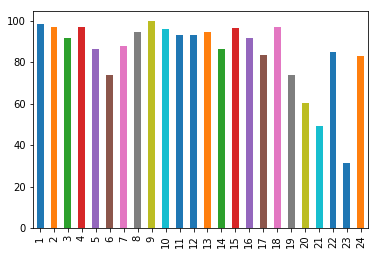

In [19]:
# вызуализация
q = table2.loc[len(table2)-1][1:-1]
q.plot(kind='bar'); #столбчатая диаграмма

## Визуализация в mathplotlib

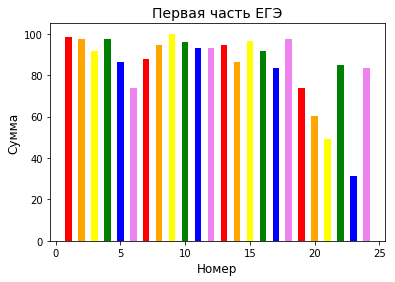

In [20]:
colorsr = ['red', 'orange', 'yellow', 'green', 'blue', 'violet']
import matplotlib.pyplot as plt
num = [i for i in range(1,number+1)]
# формируем строку с процентами
sums = pd.Series(table2.loc[len(table2)-1][1:-1])
plt.bar(num, sums, width = 0.5, color = colorsr)
plt.title("Первая часть ЕГЭ", fontsize=14)
plt.xlabel("Номер", fontsize=12)
plt.ylabel("Сумма", fontsize=12)
plt.show()

In [21]:
import openpyxl
writer = pd.ExcelWriter('analytics.xlsx', engine='openpyxl')

if os.path.exists('analytics.xlsx'):
    book = openpyxl.load_workbook('analytics.xlsx')
    writer.book = book

table2.to_excel(writer, sheet_name='result_1')
writer.save()
writer.close()

# 10. % выполнения отдельных заданий 2 части

In [22]:
import os
import pandas as pd

In [23]:
Files = ['./ege/'+i for i in os.listdir('./ege') if 'xls' in i]
print(Files)

['./ege/рус.яз\xa0— копия 46.xls', './ege/рус.яз\xa0— копия 8.xls', './ege/рус.яз\xa0— копия 9.xls', './ege/рус.яз\xa0— копия 47.xls', './ege/рус.яз\xa0— копия 45.xls', './ege/рус.яз\xa0— копия 44.xls', './ege/рус.яз\xa0— копия 40.xls', './ege/рус.яз\xa0— копия 41.xls', './ege/рус.яз\xa0— копия 43.xls', './ege/рус.яз\xa0— копия 42.xls', './ege/рус.яз\xa0— копия 19.xls', './ege/рус.яз\xa0— копия 31.xls', './ege/рус.яз\xa0— копия 25.xls', './ege/рус.яз.xls', './ege/рус.яз\xa0— копия 24.xls', './ege/рус.яз\xa0— копия 30.xls', './ege/рус.яз\xa0— копия 18.xls', './ege/рус.яз\xa0— копия 26.xls', './ege/рус.яз\xa0— копия 32.xls', './ege/рус.яз\xa0— копия.xls', './ege/рус.яз\xa0— копия 33.xls', './ege/рус.яз\xa0— копия 27.xls', './ege/рус.яз\xa0— копия 23.xls', './ege/рус.яз\xa0— копия 37.xls', './ege/рус.яз\xa0— копия 36.xls', './ege/рус.яз\xa0— копия 22.xls', './ege/рус.яз\xa0— копия 34.xls', './ege/рус.яз\xa0— копия 20.xls', './ege/рус.яз\xa0— копия 21.xls', './ege/рус.яз\xa0— копия 35.xls'

In [24]:
cols = ['kod','kod2','class','kodPPE','room','Last name', 'First name', 'Second name','doc_s','doc_number','result_1','result_2','first_ball','ball']
df2 = pd.DataFrame(columns=['kod','kod2','class','kodPPE','room','Last name', 'First name', 'Second name','doc_s','doc_number','result_1','result_2','first_ball','ball'])
for i in Files:
    table = pd.read_excel(i.strip(), header = 6)
    table.drop(table.columns[[0, 1,3,5,7,9,11,15,17,19,21,23,25]], axis=1, inplace=True)
    table.columns = cols
    # функция dropna удаляет строки где есть значения NaN 
    table = table.dropna(subset=['kod'])
    df2 = df2.append(table)
# строчка ниже делает индексацию строк сначала и правильно
# т.к. после удаление не корректных строк происходит сбой в нумерации
df2.index = np.arange(len(df2))
df2.head()

,kod,kod2,class,kodPPE,room,Last name,First name,Second name,doc_s,doc_number,result_1,result_2,first_ball,ball
0,901.0,404004.0,11В,801.0,32.0,Орлова,Валерия,Сергеевна,3213.0,356010.0,2+++++5+++++++2+-+-----4,1(1)3(3)1(1)2(3)2(2)2(2)3(3)2(3)0(2)2(2)1(1)1(1),47.0,76.0
1,901.0,404004.0,11В,801.0,14.0,Паскаль,Анна,Александровна,3213.0,331939.0,2+++++5+++++++2++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)1(2)1(1)1(1),56.0,98.0
2,901.0,404004.0,11В,801.0,16.0,Мухутдинова,Валерия,Руслановна,3213.0,332019.0,2+++++5+++++++2++++++--4,1(1)1(3)1(1)3(3)1(2)1(2)2(3)3(3)1(2)0(2)1(1)1(1),47.0,76.0
3,901.0,404004.0,11В,801.0,15.0,Нуреева,Яна,Евгеньевна,3212.0,238331.0,2+++++5+++++++2++++++++4,1(1)3(3)1(1)3(3)2(2)1(2)3(3)3(3)2(2)1(2)1(1)1(1),55.0,96.0
4,901.0,404004.0,11В,801.0,13.0,Пастушенко,Арина,Алексеевна,3213.0,355644.0,2+++++5+++++++2+++++++-3,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),55.0,96.0


In [25]:
# количество заданий в первой части
left = len(df2.result_1[1])
right = len(df2.result_2[1][::4])
left += 1
right += left
print(left, right)

25 37


In [26]:
#готовим шапку таблицы
df3 = pd.DataFrame(columns=['Last name'] + [str(i) for i in range(left,right)]+['summa'])
for t,k in enumerate(df2['result_2']):
    buf = [int(k[j]) for j in range(0,len(k),4)]
    df3.loc[t] = [table2['Last name'][t]]+[j for j in buf]+[sum(buf)]
row = t+1
df3[-5:]

,Last name,25,26,27,28,29,30,31,32,33,34,35,36,summa
3645,Ившина,1,3,1,1,1,1,2,2,1,2,1,1,17
3646,Колачева,1,3,1,3,2,2,3,3,2,2,1,1,24
3647,Колычев,1,1,1,3,2,2,3,3,2,2,1,1,22
3648,Илюхина,1,3,1,1,2,2,2,3,2,2,1,1,21
3649,Коваценко,1,3,1,2,2,2,3,3,2,2,1,1,23


In [27]:
test2=[]
for i in range(left,right):
    test2.append(df3[str(i)].sum())
#test
df3.loc[row] = ['sum']+[j for j in test2]+[' ']
df3[-3:]

,Last name,25,26,27,28,29,30,31,32,33,34,35,36,summa
3648,Илюхина,1,3,1,1,2,2,2,3,2,2,1,1,21
3649,Коваценко,1,3,1,2,2,2,3,3,2,2,1,1,23
3650,sum,3650,9700,3550,9050,6200,5700,8750,8500,5400,5600,3650,3450,


In [28]:
# тут не работает 
# функция max расчитывает самый большой балл в столбце
B = [(i * 100 / row / max(1,max(df3[str(j)][:-1])))  for j, i in enumerate (df3.loc[row][1:-1],left)]
df3.loc[row+1] = ['%']+[j for j in B]+[' ']
df3[-5:]

,Last name,25,26,27,28,29,30,31,32,33,34,35,36,summa
3647,Колычев,1,1,1,3,2,2,3,3,2,2,1,1,22
3648,Илюхина,1,3,1,1,2,2,2,3,2,2,1,1,21
3649,Коваценко,1,3,1,2,2,2,3,3,2,2,1,1,23
3650,sum,3650,9700,3550,9050,6200,5700,8750,8500,5400,5600,3650,3450,
3651,%,100,88.5845,97.2603,82.6484,84.9315,78.0822,79.9087,77.6256,73.9726,76.7123,100,94.5205,


In [29]:
df3.shape

(3652, 14)

# Визуализация части 2

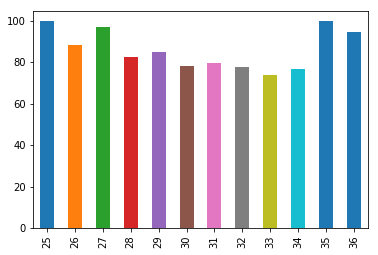

In [30]:
# вызуализация
q2 = df3.loc[len(df3)-1][1:-1]
q2.plot(kind='bar'); #столбчатая диаграмма

In [31]:
import openpyxl
writer = pd.ExcelWriter('analytics.xlsx', engine='openpyxl')

if os.path.exists('analytics.xlsx'):
    book = openpyxl.load_workbook('analytics.xlsx')
    writer.book = book

df3.to_excel(writer, sheet_name='result_2')
writer.save()
writer.close()